# KP's Repair Algorithm - Parallel Analysis

#### CPU Specifications (Agraz's Laptop) 
| Feature     | Specification |
|-------------| ------------- |
| Model| Apple Silicon M1 |
| Physical Threads (Cores)| 8 |
| Logical Threads | 8 |
| Base Clock Speed | 2.06GHz |
| Max Clock Speed | 3.20GHz |
| Cache | 8MB L3 |
| RAM Size | 8GB |

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display Pandas Dataframes Settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

PHYSICAL_THREADS = 8

In [39]:
md_serial_data = pd.read_csv("results/md_rpa_serial.csv").to_numpy()
lg_serial_data = pd.read_csv("results/lg_rpa_serial.csv").to_numpy()

md_spmd_data = pd.read_csv("results/md_rpa_spmd.csv").to_numpy()
lg_spmd_data = pd.read_csv("results/lg_rpa_spmd.csv").to_numpy()

md_spmd_nf_data = pd.read_csv("results/md_rpa_spmd_noflush.csv").to_numpy()
# lg_spmd_nf_data = pd.read_csv("results/lg_rpa_spmd_nf.csv").to_numpy()

md_static_data = pd.read_csv("results/md_rpa_static.csv").to_numpy()
# lg_static_data = pd.read_csv("results/lg_rpa_static.csv").to_numpy()

md_dynamic_data = pd.read_csv("results/md_rpa_dynamic.csv").to_numpy()
# lg_dynamic_data = pd.read_csv("results/lg_rpa_dynamic.csv").to_numpy()

md_guided_data = pd.read_csv("results/md_rpa_guided.csv").to_numpy()
# lg_guided_data = pd.read_csv("results/lg_rpa_guided.csv").to_numpy()

md_auto_data = pd.read_csv("results/md_rpa_auto.csv").to_numpy()
# lg_auto_data = pd.read_csv("results/lg_rpa_auto.csv").to_numpy()

md_lazyspmd_data = pd.read_csv("results/md_rpa_lazyspmd.csv").to_numpy()

threads_array = np.arange(start=1,stop=PHYSICAL_THREADS+1) # Returns numpy array from 1 (Inclusive) to 17 (Exclusive)

md_algorithm_data = pd.DataFrame(columns=
    ['ThreadQty', 
     'Code 1 (SPMD)',
     'Code 2 (No Flush)',
     'Code 3 (Static)',
     'Code 4 (Dynamic)',
     'Code 5 (Guided)',
     'Code 6 (Auto)',
     'Code 7 (LazySPMD)'
    ])

lg_algorithm_data = pd.DataFrame(columns=
    ['ThreadQty', 
     'Code 1 (SPMD)',
     'Code 2 (No Flush)',
     'Code 3 (Static)',
     'Code 4 (Dynamic)',
     'Code 5 (Guided)',
     'Code 6 (Auto)',
     'Code 7 (LazySPMD)'
    ])

columns = pd.MultiIndex.from_product([['Speedup', 'Efficiency', 'Parallelizability']], names=[''])
codes = ['SPMD', 'No Flush', 'Static', 'Dynamic', 'Guided', 'Auto', 'LazySPMD']
rows = pd.MultiIndex.from_tuples([(thread, code) for thread in threads_array for code in codes], names=['ThreadQty', ''])
md_algorithm_metrics = pd.DataFrame(index=rows, columns=columns)
lg_algorithm_metrics = pd.DataFrame(index=rows, columns=columns)

In [40]:
secuential_data = pd.DataFrame(columns=['Code 0 (Medium)', 'Code 0 (Large)'])
secuential_data.loc['1'] = [np.mean(md_serial_data), np.mean(lg_serial_data)]
print("\033[1mSecuential Algorithm Execution Time:\033[0m\n \tCHROMOSOMES: 6000\tGENES: 15")
secuential_data

Secuential Algorithm Execution Time:
 	CHROMOSOMES: 6000	GENES: 15


,Code 0 (Medium),Code 0 (Large)
1,192.741969,621.712001


In [41]:
# Medium Instance Data
for index in range(len(md_spmd_data)):
    md_algorithm_data.loc[f'{index+1}'] = [
        f'{threads_array[index]}', 
        md_spmd_data[index][0],
        md_spmd_nf_data[index][0], 
        md_static_data[index][0],
        md_dynamic_data[index][0],
        md_guided_data[index][0],
        md_auto_data[index][0],
        md_lazyspmd_data[index][0]
    ]

md_algorithm_data.set_index('ThreadQty', inplace=True)
print("\033[1mMedium Instance Results:\033[0m\n \tCHROMOSOMES: 6000\tGENES: 15\n \tTimes Executed per Thread: 5")
md_algorithm_data

Medium Instance Results:
 	CHROMOSOMES: 6000	GENES: 15
 	Times Executed per Thread: 5


,Code 1 (SPMD),Code 2 (No Flush),Code 3 (Static),Code 4 (Dynamic),Code 5 (Guided),Code 6 (Auto),Code 7 (LazySPMD)
ThreadQty,,,,,,,
1,192.741969,192.741969,192.741969,192.741969,192.741969,192.741969,192.741969
2,49.080863,50.419678,50.086802,49.662228,49.858710,49.931663,100.084645
3,22.685580,22.954223,23.156300,23.234489,22.732844,24.713627,73.854551
4,12.973739,14.134414,14.489438,14.991851,13.928304,15.720448,61.575130
5,10.812508,11.443378,12.171615,11.710969,11.452784,12.419880,62.161343
6,9.138421,9.708144,10.321208,9.769092,9.651872,10.237768,61.960046
7,8.203059,8.636376,9.125896,8.855033,8.709451,8.765068,63.660436
8,7.012189,7.196074,7.476098,7.276084,7.453582,7.372338,60.817592


In [42]:
# Large Instance Data
# for index in range(len(lg_spmd_data)):
#     lg_algorithm_data.loc[f'{index+1}'] = [
#         f'{threads_array[index]}', 
#         lg_spmd_data[index][0], 
#         spmd_parfor_data[index],
#         # sstatic_data[index],
#         # sdynamic_data[index],
#         # sguided_data[index],
#         # sauto_data[index],

#     ]

# lg_algorithm_data.set_index('ThreadQty', inplace=True)
# print("\033[1mLarge Instance Results:\033[0m\n \tCHROMOSOMES: 6000\tGENES: 30\n \tTimes Executed per Thread: 5")
# lg_algorithm_data

In [43]:
# Medium Instance Metrics
for index in range(len(threads_array)):
    for j in range(len(codes)):
        speedup = secuential_data.iat[0, 0] / np.round(md_algorithm_data.iat[index, j], 6)
        efficiency = np.round((speedup / md_algorithm_data.iat[index, j]) * 100, 2)
        parallelizability = np.round(md_algorithm_data.iat[0, j] / md_algorithm_data.iat[index, j],3)

        md_algorithm_metrics.at[(threads_array[index], codes[j]), ('Speedup')] = speedup
        md_algorithm_metrics.at[(threads_array[index], codes[j]), ('Efficiency')] = f'{efficiency}%'
        md_algorithm_metrics.at[(threads_array[index], codes[j]), ('Parallelizability')] = parallelizability
        
print("\033[1mAlgorithms Metrics\033[0m")
md_algorithm_metrics

Algorithms Metrics


Speedup Efficiency Parallelizability
ThreadQty                                                 
1         SPMD            1.0      0.52%               1.0
          No Flush        1.0      0.52%               1.0
          Static          1.0      0.52%               1.0
          Dynamic         1.0      0.52%               1.0
          Guided          1.0      0.52%               1.0
          Auto            1.0      0.52%               1.0
          LazySPMD        1.0      0.52%               1.0
2         SPMD       3.927029       8.0%             3.927
          No Flush   3.822753      7.58%             3.823
          Static     3.848159      7.68%             3.848
          Dynamic    3.881058      7.81%             3.881
          Guided     3.865763      7.75%             3.866
          Auto       3.860115      7.73%              3.86
          LazySPMD    1.92579      1.92%             1.926
3         SPMD       8.496233     37.45%             8.496
          No Flush   8.396798     36.58%             8.397
          Static     8.323522     35.94%             8.324
          Dynamic    8.295511      35.7%             8.296
          Guided     8.478568      37.3%             8.479
          Auto       7.799016     31.56%             7.799
          LazySPMD   2.609751      3.53%              2.61
4         SPMD      14.856316    114.51%            14.856
          No Flush  13.636361     96.48%            13.636
          Static    13.302239     91.81%            13.302
          Dynamic   12.856449     85.76%            12.856
          Guided    13.838151     99.35%            13.838
          Auto       12.26059     77.99%            12.261
          LazySPMD   3.130192      5.08%              3.13
5         SPMD      17.825834    164.86%            17.826
          No Flush  16.843101    147.19%            16.843
          Static    15.835365     130.1%            15.835
          Dynamic   16.458243    140.54%            16.458
          Guided    16.829268    146.94%            16.829
          Auto      15.518827    124.95%            15.519
          LazySPMD   3.100673      4.99%             3.101
6         SPMD      21.091386     230.8%            21.091
          No Flush  19.853637     204.5%            19.854
          Static    18.674361    180.93%            18.674
          Dynamic   19.729773    201.96%             19.73
          Guided    19.969387     206.9%            19.969
          Auto      18.826562    183.89%            18.827
          LazySPMD   3.110746      5.02%             3.111
7         SPMD      23.496353    286.43%            23.496
          No Flush  22.317459    258.41%            22.317
          Static    21.120334    231.43%             21.12
          Dynamic   21.766375    245.81%            21.766
          Guided    22.130209    254.09%             22.13
          Auto      21.989786    250.88%             21.99
          LazySPMD   3.027657      4.76%             3.028
8         SPMD      27.486705    391.98%            27.487
          No Flush  26.784323    372.21%            26.784
          Static    25.781092    344.85%            25.781
          Dynamic   26.489794    364.07%             26.49
          Guided    25.858972    346.93%            25.859
          Auto      26.143941    354.62%            26.144
          LazySPMD   3.169181      5.21%             3.169

In [44]:
# Large Instance Metrics
# for index in range(len(threads_array)):
#     for j in range(len(codes)):
#         speedup = secuential_data.iat[0, 0] / np.round(md_algorithm_data.iat[index, j], 6)
#         efficiency = np.round((speedup / md_algorithm_data.iat[index, j]) * 100, 2)
#         parallelizability = np.round(md_algorithm_data.iat[0, j] / md_algorithm_data.iat[index, j],3)

#         md_algorithm_metrics.at[(threads_array[index], codes[j]), ('Speedup')] = speedup
#         md_algorithm_metrics.at[(threads_array[index], codes[j]), ('Efficiency')] = f'{efficiency}%'
#         md_algorithm_metrics.at[(threads_array[index], codes[j]), ('Parallelizability')] = parallelizability
        
# print("\033[1mAlgorithms Metrics\033[0m")
# md_algorithm_metrics

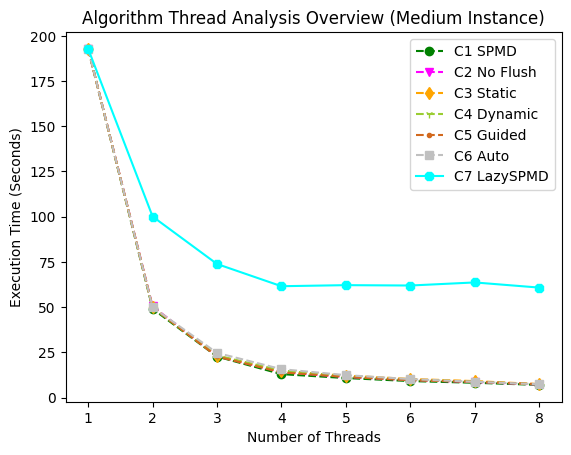

In [45]:
plt.title("Algorithm Thread Analysis Overview (Medium Instance)")
plt.xlabel("Number of Threads")
plt.ylabel("Execution Time (Seconds)")
plt.plot(threads_array, md_algorithm_data.get('Code 1 (SPMD)'), 'o--', label="C1 SPMD", color='green')
plt.plot(threads_array, md_algorithm_data.get('Code 2 (No Flush)'), 'v--', label="C2 No Flush", color='magenta')
plt.plot(threads_array, md_algorithm_data.get('Code 3 (Static)'), 'd--', label="C3 Static", color='orange')
plt.plot(threads_array, md_algorithm_data.get('Code 4 (Dynamic)'), '1--', label="C4 Dynamic", color='yellowgreen')
plt.plot(threads_array, md_algorithm_data.get('Code 5 (Guided)'), '.--', label="C5 Guided", color='chocolate')
plt.plot(threads_array, md_algorithm_data.get('Code 6 (Auto)'), 's--', label="C6 Auto", color='silver')
plt.plot(threads_array, md_algorithm_data.get('Code 7 (LazySPMD)'), '8-', label="C7 LazySPMD", color='cyan')
plt.legend(loc="upper right")
plt.xticks(threads_array)
plt.show()

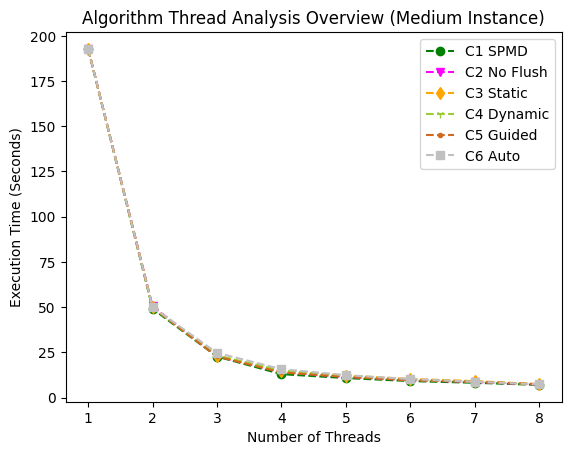

In [46]:
plt.title("Algorithm Thread Analysis Overview (Medium Instance)")
plt.xlabel("Number of Threads")
plt.ylabel("Execution Time (Seconds)")
plt.plot(threads_array, md_algorithm_data.get('Code 1 (SPMD)'), 'o--', label="C1 SPMD", color='green')
plt.plot(threads_array, md_algorithm_data.get('Code 2 (No Flush)'), 'v--', label="C2 No Flush", color='magenta')
plt.plot(threads_array, md_algorithm_data.get('Code 3 (Static)'), 'd--', label="C3 Static", color='orange')
plt.plot(threads_array, md_algorithm_data.get('Code 4 (Dynamic)'), '1--', label="C4 Dynamic", color='yellowgreen')
plt.plot(threads_array, md_algorithm_data.get('Code 5 (Guided)'), '.--', label="C5 Guided", color='chocolate')
plt.plot(threads_array, md_algorithm_data.get('Code 6 (Auto)'), 's--', label="C6 Auto", color='silver')
plt.legend(loc="upper right")
plt.xticks(threads_array)
plt.show()